In [2]:
# Import basic Library 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
import sklearn

2023-07-01 20:24:52.669293: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-01 20:24:52.737558: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-01 20:24:52.738458: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 20:24:53.754817: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# lOAD The dataset 
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv")

In [4]:
df.shape

(10000, 14)

In [6]:
# Split the dataset into independent and dependent 
X = df.iloc[:, 3:13]
y = df.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [28]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
geography = pd.get_dummies(df.Geography,drop_first=True)
gender = pd.get_dummies(df.Gender,drop_first=True)

In [10]:
X.drop(columns=['Geography','Gender'],inplace=True)

In [11]:
X= pd.concat([X,geography,gender],axis=1)

In [17]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
# For Which all algorithm Scaling is required :

# Anything related to distance based Scaling required 
# But Boosting Technique not required that ,,,,,

In [20]:
# Feature Scaling : 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train.shape

(7000, 11)

In [22]:
X_test.shape

(3000, 11)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout




In [ ]:
# Sequential : KIND OF BLOCK WHERE FP AND BP 
# Dense : WHENEVER WANT TO CREATE HIDDEN LAYER WE USE DENSE
# Activation : APPLYING BASED ON PROBLEM 
# Dropout : TO REDUCE OVERFITTING WE USE DROPOUT LAYER WHERE NO USE IT WILL DEACTIVATE


In [33]:
# lET iNITialize the ann:

classifer = Sequential()

# Adding the Input layer
classifer.add(Dense(units=11,activation='relu'))


# Adding the Hidden layer -1
classifer.add(Dense(units=7,activation='relu'))
classifer.add(Dropout(0.2))


# Adding the Hidden layer -2
classifer.add(Dense(units=7,activation='relu'))

# Adding the Output layer 
classifer.add(Dense(units=1,activation='sigmoid'))


In [34]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.1)

classifer.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
# Early Stopping - 

import tensorflow as tf 

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [36]:
# Stopped at 33 Epochs : Here Accuracy not Increasing
model_history = classifer.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


469/469 [==============================] - 2s 3ms/step - loss: 0.5059 - accuracy: 0.7959 - val_loss: 0.4897 - val_accuracy: 0.7962
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5021 - accuracy: 0.7985 - val_loss: 0.5048 - val_accuracy: 0.7962
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5008 - accuracy: 0.7978 - val_loss: 0.4981 - val_accuracy: 0.7962
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5023 - accuracy: 0.7980 - val_loss: 0.5072 - val_accuracy: 0.7962
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5042 - accuracy: 0.7985 - val_loss: 0.5083 - val_accuracy: 0.7962
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5065 - accuracy: 0.7985 - val_loss: 0.5090 - val_accuracy: 0.7962
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5062 - accuracy: 0.7985 - val_loss: 0.5051 - val_accuracy: 0.7962
Epoch 8/100

In [37]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

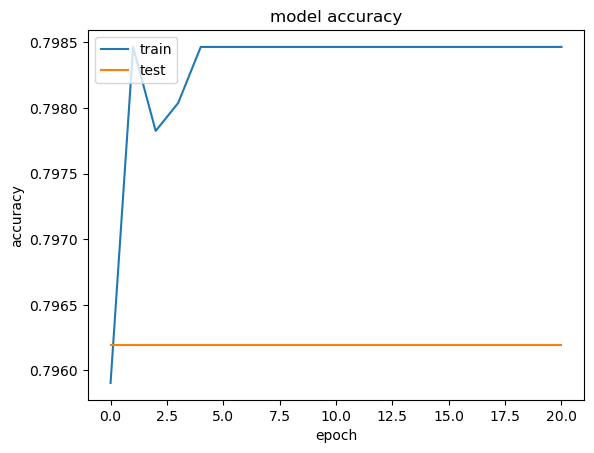

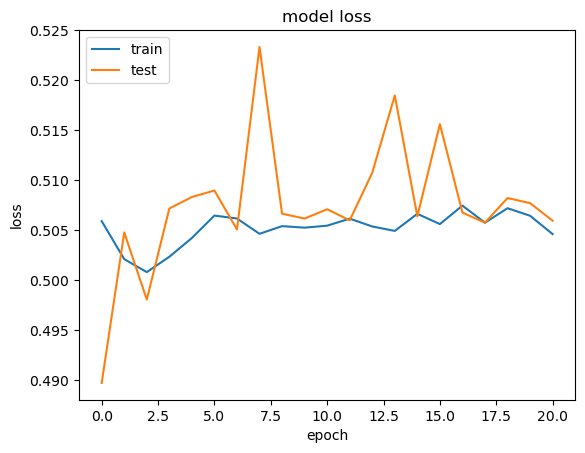

In [38]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
y_pred = classifer.predict(X_test)
y_pred= (y_pred>=0.5)

94/94 [==============================] - 0s 900us/step


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[2379,    0],
       [ 621,    0]])

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.793

In [42]:
classifer.get_weights() # This Many it trained on : 

[array([[ 2.3969923e-01,  1.5458559e+00,  4.3073118e-01, -2.5201635e+00,
          2.2102017e+00, -4.9741283e-01,  2.7354939e+00, -1.3093815e+00,
          8.2038206e-01, -3.3742409e+00,  1.5166006e+00],
        [ 2.5746577e+00, -7.1911985e-01, -2.9214480e+00,  2.2756920e+00,
          7.2631383e-01, -2.6604185e+00,  1.6093363e+00, -9.9170227e+00,
          2.1726345e-01,  3.5705223e+00, -6.6001433e-01],
        [-3.1718833e+00,  6.9976550e-01, -2.7807233e-01, -7.9158449e-01,
         -1.2537780e-01,  1.1172775e+00, -2.0255525e+00,  3.6290069e+00,
         -2.4912493e-01,  1.2394559e+00, -2.3472009e+00],
        [ 2.1795561e+00,  9.1308981e-01, -8.9080733e-01,  5.6667013e+00,
         -5.4323578e-01, -1.3750367e+00, -3.2580056e+00, -7.0216975e+00,
         -6.4555156e-01,  7.0909184e-01,  2.5326279e-01],
        [ 8.1979275e+00,  6.7861390e-01,  4.0308726e-01, -8.7136631e+00,
          8.6682349e-02, -1.0474838e+00, -3.1713364e+00, -2.3713522e-01,
          3.3662668e-01, -2.2198808e+0

In [ ]:
# RF : BB
# DT : WB
# LR : LR,NB